In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [65]:
df=pd.read_csv('/content/drive/MyDrive/Data Science/EMAIL SPAM DETECTION/DATA/cleaned_email_message_based.csv')


In [67]:
data=pd.DataFrame(df)
data

,spam,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5566,1,This is the 2nd time we have tried 2 contact u...
5567,0,Will ü b going to esplanade fr home?
5568,0,"Pity, * was in mood for that. So...any other s..."
5569,0,The guy did some bitching but I acted like i'd...


In [68]:
def calculate_spam_ham(data):
  n_0=0;
  n_1=0;
  for i in data:
    if(int(i)==0):
      n_0=n_0+1
    else:
      n_1=n_1+1
  return n_0,n_1

In [69]:
message_0,message_1=calculate_spam_ham(data['spam'])

Text(0, 0.5, 'No of Data')

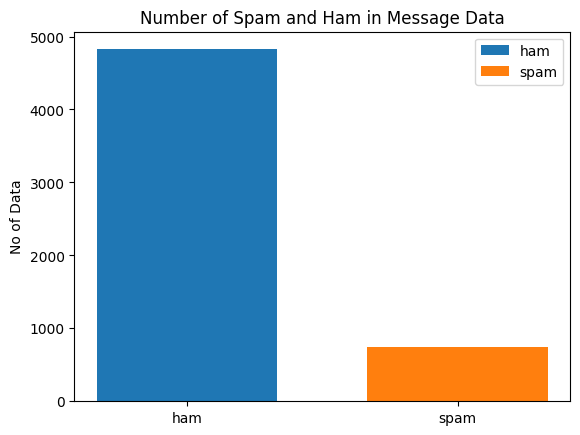

In [70]:
plt.bar([0],message_0,width=1,label='ham')
plt.bar([1.5],message_1,width=1,label='spam')
plt.xticks([0,1.5],['ham','spam'])
plt.legend()
plt.title('Number of Spam and Ham in Message Data')
plt.ylabel('No of Data')

Text(0.5, 1.0, 'Length of message vs Frequency')

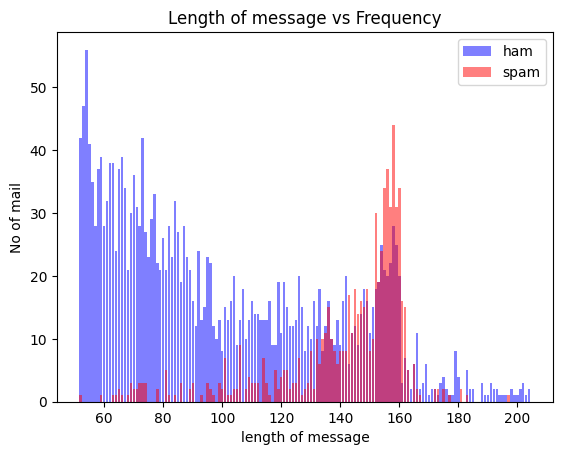

In [103]:
data['length']=[len(e) for e in data['Message']]
unique_length_arr=np.sort(data['length'].unique())
spam_unique_arr=[]
ham_unique_arr=[]
for i in range(len(unique_length_arr)):
  spam_unique_arr.append(0)
  ham_unique_arr.append(0)
for i in range(data.shape[0]):
  if(data.iloc[i].spam==0):
    l=np.where(unique_length_arr == data.iloc[i].length)[0][0]
    ham_unique_arr[l] += 1
  else:
    spam_unique_arr[np.where(unique_length_arr==data.iloc[i].length)[0][0]]+=1
plt.bar(unique_length_arr[50:200],ham_unique_arr[50:200],label='ham',color='blue',alpha=0.5)
plt.bar(unique_length_arr[50:200],spam_unique_arr[50:200],label='spam',color='red',alpha=0.5)
plt.legend()
plt.xlabel('length of message')
plt.ylabel('No of mail')
plt.title('Length of message vs Frequency')